<a href="https://colab.research.google.com/github/yenajo98/Amsterdam_housing_occupants/blob/main/ML_Project_Model_Development_Amsterdam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from termcolor import colored as cl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge, ElasticNet
from sklearn.metrics import explained_variance_score as evs, r2_score as r2
import xgboost as xgb
import lightgbm as lgb
from scipy.stats import skew, stats, pearsonr, norm
from collections import Counter
from sklearn.linear_model import LassoCV, LassoLarsCV, ElasticNetCV
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler

warnings.filterwarnings('ignore')
sns.set(style='white', context='notebook', palette='deep')
%config InlineBackend.figure_format = 'retina'  # set 'png' here when working on notebook
%matplotlib inline


In [2]:
import pandas as pd
weekdays=pd.read_csv('/content/amsterdam_weekdays.csv')
weekdays

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,1098,2486.115342,Entire home/apt,False,False,2.0,False,0,0,10.0,100.0,1,2.375833,1.436054,181.198355,9.594573,225.304203,15.699521,4.85869,52.37677
1099,1099,233.637194,Private room,False,True,2.0,False,1,0,10.0,90.0,1,4.719736,0.322263,108.024880,5.719989,134.775277,9.391335,4.83611,52.34910
1100,1100,317.062311,Private room,False,True,2.0,False,1,0,10.0,92.0,1,0.598355,0.751993,440.476515,23.323524,625.947562,43.616927,4.88897,52.37798
1101,1101,1812.855904,Entire home/apt,False,False,4.0,False,0,0,8.0,84.0,5,1.943020,0.388532,257.948105,13.658524,336.589237,23.454022,4.90688,52.35794


## DATA PREPROCESSING

In [4]:
#Drop the unnamed column
weekends = weekends.drop(weekends.columns[0], axis=1)
weekdays = weekdays.drop(weekdays.columns[0], axis=1)
# Drop the specified columns
columns_to_drop = ['attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm']
weekends = weekends.drop(columns_to_drop, axis=1)
weekdays = weekdays.drop(columns_to_drop, axis=1)
weekends = weekends.rename(columns={'realSum': 'Price'})
weekdays = weekdays.rename(columns={'realSum': 'Price'})
# Filter out boolean format variables
bool_cols = weekdays.select_dtypes(include=bool).columns

# Convert boolean variables to object variable type
weekdays[bool_cols] = weekdays[bool_cols].astype(str)


# Filter out boolean format variables
bool_cols = weekends.select_dtypes(include=bool).columns

# Convert boolean variables to object variable type
weekends[bool_cols] = weekends[bool_cols].astype(str)
# One-hot encode categorical features
weekdays = pd.get_dummies(weekdays)
weekdays

## Modelling

### Linear Regression

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

# Split your data into X and y
X = weekdays.drop("Price", axis=1)
y = weekdays["Price"]

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
lr = LinearRegression()

# Train the model
lr.fit(X_train, y_train)

# Make predictions
y_pred = lr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)  # Calculate RMSE
mae = mean_absolute_error(y_test, y_pred)  # Calculate MAE
r2 = r2_score(y_test, y_pred)  # Calculate R2

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Mean Squared Error: 2.3485090677476052e-07
Root Mean Squared Error: 0.00048461418342302006
Mean Absolute Error: 0.0003791908001220329
R-squared: 0.6749399690382645


In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import RobustScaler
from numpy import sqrt
import numpy as np

# Apply log1p transformation to the target variable
weekdays["Price"] = np.log1p(weekdays["Price"])

# Split your data into X and y
X = weekdays.drop("Price", axis=1)
y = weekdays["Price"]

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply RobustScaler to X_train and X_test
rb = RobustScaler()
X_train_Rb = rb.fit_transform(X_train)
X_test_Rb = rb.transform(X_test)

# Apply RobustScaler to y_train and y_test
rb_y = RobustScaler()
y_train_Rb = rb_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_Rb = rb_y.transform(y_test.values.reshape(-1, 1))

# Create a Linear Regression model
lr = LinearRegression()

# Define the parameter grid
param_grid = {
    'fit_intercept': [True, False]
}

# Initialize the grid search
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train_Rb, y_train_Rb.ravel())

# Get the best parameters
best_params = grid_search.best_params_

# Train the model using the best parameters
best_lr = LinearRegression(**best_params)
best_lr.fit(X_train_Rb, y_train_Rb.ravel())

# Now you can use best_lr to make predictions
y_pred = best_lr.predict(X_test_Rb)

# Evaluate the model
mse = mean_squared_error(y_test_Rb.ravel(), y_pred)
rmse = sqrt(mse)  # Calculate RMSE
mae = mean_absolute_error(y_test_Rb.ravel(), y_pred)  # Calculate MAE
r2 = r2_score(y_test_Rb.ravel(), y_pred)  # Calculate R2

print(f"Best parameters: {best_params}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best parameters: {'fit_intercept': True}
Mean Squared Error: 0.13421740920060643
Root Mean Squared Error: 0.36635694233985305
Mean Absolute Error: 0.2866526177353042
R-squared: 0.6749366090067754


### Ridge regression


In [61]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

# Split your data into X and y
X = weekdays.drop("Price", axis=1)
y = weekdays["Price"]

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define the grid of hyperparameters to search
hyperparameter_grid = {'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]}

# Create a Ridge Regression model
ridge = Ridge()

# Set up the grid search with 5-fold cross validation
grid_cv = GridSearchCV(ridge, hyperparameter_grid, cv=5, scoring='neg_mean_squared_error')

# Train the model
grid_cv.fit(X_train, y_train)

# Get the best hyperparameters
print(f"Best parameters: {grid_cv.best_params_}")

# Make predictions with the best hyperparameters
y_pred_test = grid_cv.predict(X_test)
y_pred_train = grid_cv.predict(X_train)

# Calculate additional evaluation metrics for test set
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Calculate additional evaluation metrics for training set
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Print all evaluation metrics for test set
print("Test set metrics:")
print(f"Mean Squared Error: {mse_test}")
print(f"Root Mean Squared Error: {rmse_test}")
print(f"Mean Absolute Error: {mae_test}")
print(f"R-squared: {r2_test}")

# Print all evaluation metrics for training set
print("\nTraining set metrics:")
print(f"Mean Squared Error: {mse_train}")
print(f"Root Mean Squared Error: {rmse_train}")
print(f"Mean Absolute Error: {mae_train}")
print(f"R-squared: {r2_train}")


Best parameters: {'alpha': 0.01}
Test set metrics:
Mean Squared Error: 1.6483725962131902e-07
Root Mean Squared Error: 0.0004060015512548185
Mean Absolute Error: 0.0003175925735250864
R-squared: 0.6745464509166907

Training set metrics:
Mean Squared Error: 1.7049704909942522e-07
Root Mean Squared Error: 0.25400494931782636
Mean Absolute Error: 0.00031492497313263546
R-squared: 0.7046561665016036


### Hyperparmeter tuning with log1p which applies log(1+x) to all elements of the column

Best parameters: {'alpha': 1}
Test set metrics:
Mean Squared Error: 0.13369923448352486
Root Mean Squared Error: 0.36564905918588775
Mean Absolute Error: 0.2860766143779748
R-squared: 0.6761520846073483

Training set metrics:
Mean Squared Error: 0.13886135983327955
Root Mean Squared Error: 0.3726410603157944
Mean Absolute Error: 0.2843671916324577
R-squared: 0.7047739814012707

 mu = 0.14 and sigma = 0.00



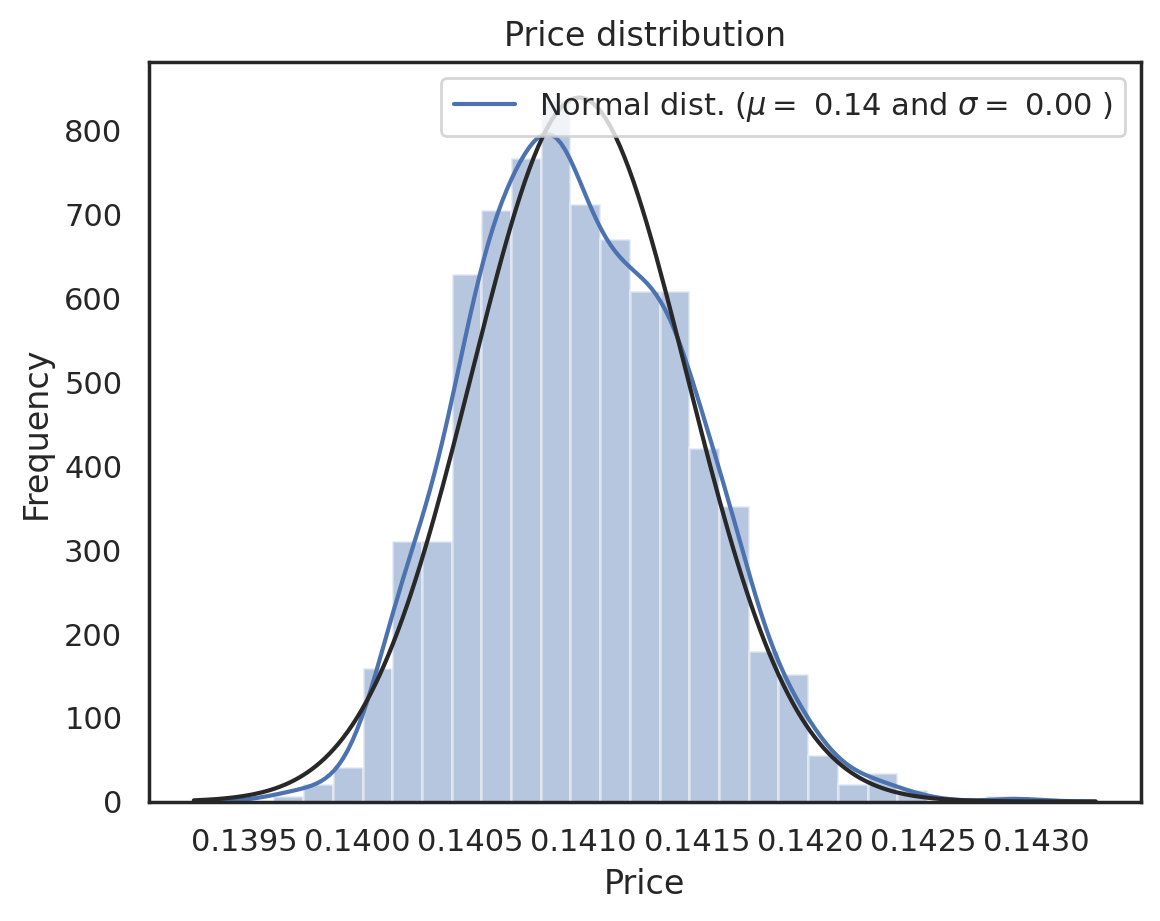

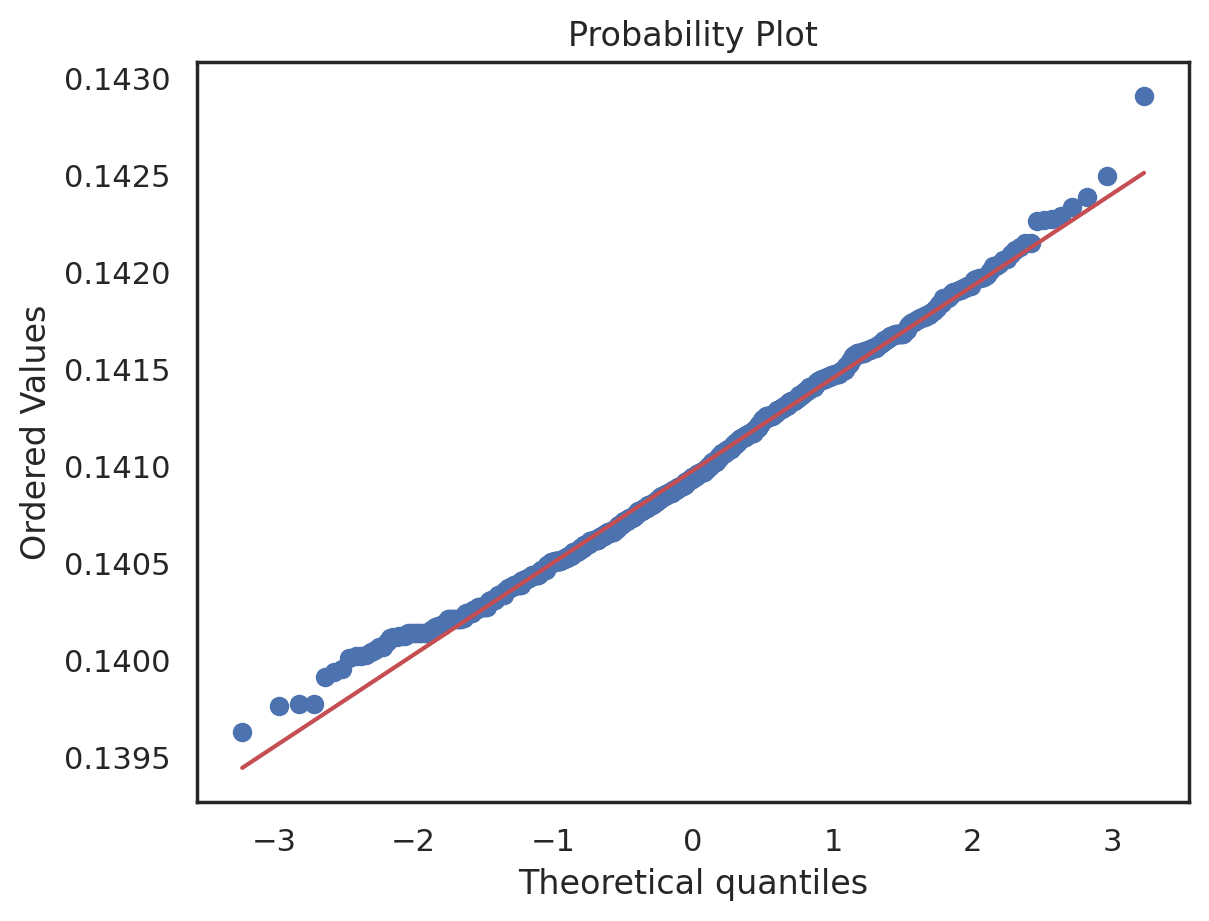

Skewness: 0.252298
Kurtosis: -0.161056


In [64]:
import numpy as np
import seaborn as sns
from scipy.stats import norm, probplot
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt

# Apply log1p transformation to the target variable
weekdays["Price"] = np.log1p(weekdays["Price"])

# Split your data into X and y
X = weekdays.drop("Price", axis=1)
y = weekdays["Price"]

# Split your data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply RobustScaler to X_train and X_test
rb = RobustScaler()
X_train_Rb = rb.fit_transform(X_train)
X_test_Rb = rb.transform(X_test)

# Apply RobustScaler to y_train and y_test
rb_y = RobustScaler()
y_train_Rb = rb_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_Rb = rb_y.transform(y_test.values.reshape(-1, 1))

# Define the grid of hyperparameters to search
hyperparameter_grid = {'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]}

# Create a Ridge Regression model
ridge = Ridge()

# Set up the grid search with 5-fold cross validation
grid_cv = GridSearchCV(ridge, hyperparameter_grid, cv=5, scoring='neg_mean_squared_error')

# Train the model
grid_cv.fit(X_train_Rb, y_train_Rb.ravel())

# Get the best hyperparameters
print(f"Best parameters: {grid_cv.best_params_}")

# Make predictions with the best hyperparameters
y_pred_test = grid_cv.predict(X_test_Rb)
y_pred_train = grid_cv.predict(X_train_Rb)

# Calculate additional evaluation metrics for test set
rmse_test = mean_squared_error(y_test_Rb.ravel(), y_pred_test, squared=False)
mse_test = mean_squared_error(y_test_Rb.ravel(), y_pred_test)
mae_test = mean_absolute_error(y_test_Rb.ravel(), y_pred_test)
r2_test = r2_score(y_test_Rb.ravel(), y_pred_test)

# Calculate additional evaluation metrics for training set
rmse_train = mean_squared_error(y_train_Rb.ravel(), y_pred_train, squared=False)
mse_train = mean_squared_error(y_train_Rb.ravel(), y_pred_train)
mae_train = mean_absolute_error(y_train_Rb.ravel(), y_pred_train)
r2_train = r2_score(y_train_Rb.ravel(), y_pred_train)

# Print all evaluation metrics for test set```python
print("Test set metrics:")
print(f"Mean Squared Error: {mse_test}")
print(f"Root Mean Squared Error: {rmse_test}")
print(f"Mean Absolute Error: {mae_test}")
print(f"R-squared: {r2_test}")

# Print all evaluation metrics for training set
print("\nTraining set metrics:")
print(f"Mean Squared Error: {mse_train}")
print(f"Root Mean Squared Error: {rmse_train}")
print(f"Mean Absolute Error: {mae_train}")
print(f"R-squared: {r2_train}")

# Check the new distribution
sns.distplot(weekdays['Price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(weekdays['Price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')

fig = plt.figure()
res = probplot(weekdays['Price'], plot=plt)
plt.show()

print("Skewness: %f" % weekdays['Price'].skew())
print("Kurtosis: %f" % weekdays['Price'].kurt())


### Gradient Boosting

In [71]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Split your data into X and y
X = weekdays.drop("Price", axis=1)
y = weekdays["Price"]

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Regressor model
gbr = GradientBoostingRegressor()

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10]
}

# Initialize the grid search
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the model using the best parameters
best_gbr = GradientBoostingRegressor(**best_params)
best_gbr.fit(X_train, y_train)

# Now you can use best_gbr to make predictions
y_pred = best_gbr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Calculate RMSE
mae = mean_absolute_error(y_test, y_pred)  # Calculate MAE
r2 = r2_score(y_test, y_pred)  # Calculate R2

print(f"Best parameters: {best_params}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Mean Squared Error: 6.355433301345657e-08
Root Mean Squared Error: 0.000252099847309467
Mean Absolute Error: 0.0001943316024108925
R-squared: 0.687713290803264


In [69]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import RobustScaler
from numpy import sqrt
import numpy as np

# Apply log1p transformation to the target variable
y = np.log1p(weekdays["Price"])

# Split your data into X and y
X = weekdays.drop("Price", axis=1)

# Apply RobustScaler to X
rb = RobustScaler()
X_Rb = rb.fit_transform(X)

# Apply RobustScaler to y
rb_y = RobustScaler()
y_Rb = rb_y.fit_transform(y.values.reshape(-1, 1))

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_Rb, y_Rb, test_size=0.2, random_state=42)

# Create a Gradient Boosting Regressor model
gbr = GradientBoostingRegressor()

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10]
}

# Initialize the grid search
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train.ravel())

# Get the best parameters
best_params = grid_search.best_params_

# Train the model using the best parameters
best_gbr = GradientBoostingRegressor(**best_params)
best_gbr.fit(X_train, y_train.ravel())

# Now you can use best_gbr to make predictions
y_pred = best_gbr.predict(X_test)

# Convert the predictions back to original scale
y_pred = rb_y.inverse_transform(y_pred.reshape(-1, 1))
y_test_orig = rb_y.inverse_transform(y_test)

# Evaluate the model
mse = mean_squared_error(y_test_orig, y_pred)
rmse = sqrt(mse)  # Calculate RMSE
mae = mean_absolute_error(y_test_orig, y_pred)  # Calculate MAE
r2 = r2_score(y_test_orig, y_pred)  # Calculate R2

print(f"Best parameters: {best_params}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Mean Squared Error: 4.864179341501222e-08
Root Mean Squared Error: 0.00022054884587095942
Mean Absolute Error: 0.00017018664174384097
R-squared: 0.6888416095510856


### Random Forest

In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

# Split your data into X and y
X = weekdays.drop("Price", axis=1)
y = weekdays["Price"]

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define the model
rf = RandomForestRegressor()

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Initialize the grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the model using the best parameters
best_rf = RandomForestRegressor(**best_params)
best_rf.fit(X_train, y_train)

# Now you can use best_rf to make predictions
y_pred_train = best_rf.predict(X_train)
y_pred_test = best_rf.predict(X_test)

# Calculate metrics on the training set
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Calculate metrics on the testing set
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Print the metrics
print(f'Training MSE: {mse_train}')
print(f'Training RMSE: {rmse_train}')
print(f'Training MAE: {mae_train}')
print(f'Training R2: {r2_train}')
print()
print(f'Testing MSE: {mse_test}')
print(f'Testing RMSE: {rmse_test}')
print(f'Testing MAE: {mae_test}')
print(f'Testing R2: {r2_test}')
print(f'Best parameters: {best_params}')

Fitting 3 folds for each of 540 candidates, totalling 1620 fits
Training MSE: 1.039785264863088e-07
Training RMSE: 0.00032245701494355616
Training MAE: 0.00023748820200944528
Training R2: 0.9144343395329714

Testing MSE: 3.1047410357543756e-07
Testing RMSE: 0.0005572020312018232
Testing MAE: 0.0004300611669026167
Testing R2: 0.7086690943843066
Best parameters: {'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

# Define the model
rf = RandomForestRegressor()

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Initialize the grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train_Rb, y_train_Rb.ravel())

# Get the best parameters
best_params = grid_search.best_params_

# Train the model using the best parameters
best_rf = RandomForestRegressor(**best_params)
best_rf.fit(X_train_Rb, y_train_Rb.ravel())

# Now you can use best_rf to make predictions
y_pred_train = best_rf.predict(X_train_Rb)
y_pred_test = best_rf.predict(X_test_Rb)

# Calculate metrics on the training set
mse_train = mean_squared_error(y_train_Rb.ravel(), y_pred_train)
rmse_train = sqrt(mse_train)
mae_train = mean_absolute_error(y_train_Rb.ravel(), y_pred_train)
r2_train = r2_score(y_train_Rb.ravel(), y_pred_train)

# Calculate metrics on the testing set
mse_test = mean_squared_error(y_test_Rb.ravel(), y_pred_test)
rmse_test = sqrt(mse_test)
mae_test = mean_absolute_error(y_test_Rb.ravel(), y_pred_test)
r2_test = r2_score(y_test_Rb.ravel(), y_pred_test)

# Print the metrics
print(f'Training MSE: {mse_train}')
print(f'Training RMSE: {rmse_train}')
print(f'Training MAE: {mae_train}')
print(f'Training R2: {r2_train}')
print()
print(f'Testing MSE: {mse_test}')
print(f'Testing RMSE: {rmse_test}')
print(f'Testing MAE: {mae_test}')
print(f'Testing R2: {r2_test}')
print(f'Best parameters: {best_params}')


Fitting 3 folds for each of 540 candidates, totalling 1620 fits
Training MSE: 0.06451851427795155
Training RMSE: 0.25400494931782636
Training MAE: 0.18993558460026036
Training R2: 0.8629393382115991

Testing MSE: 0.12208064243106263
Testing RMSE: 0.3494004041655685
Testing MAE: 0.27113325554535606
Testing R2: 0.704347841614297
Best parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
